# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [2]:
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
cdf = df[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]
cdf.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [5]:
cdf.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

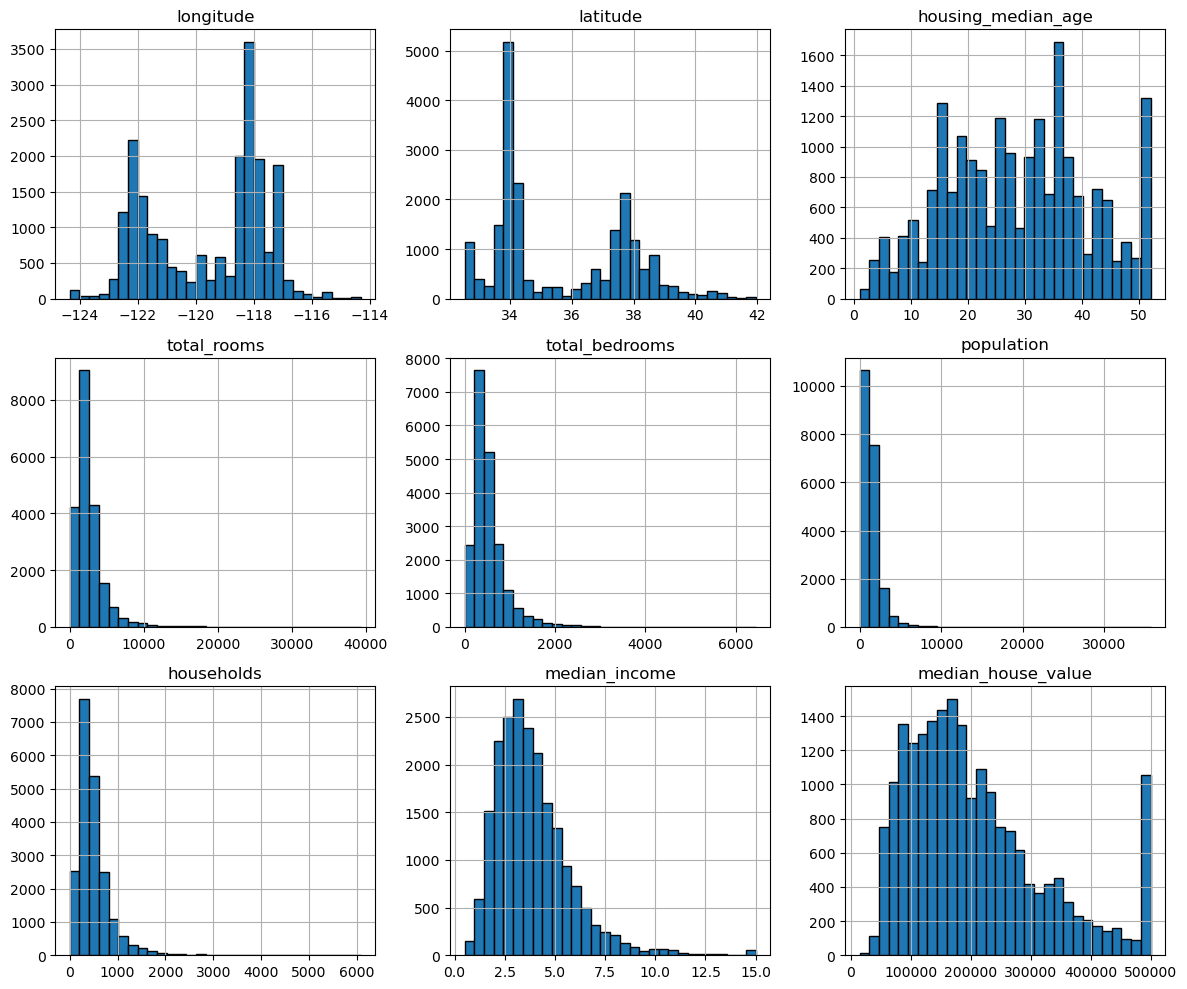

In [6]:
cdf.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [7]:
print(cdf.isnull().sum())
cdf = cdf.dropna().copy()
print(cdf.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [8]:
cdf["rooms_per_household"] = cdf["total_rooms"] / cdf["households"]
cdf["population_per_household"] = cdf["population"] / cdf["households"]
cdf["bedrooms_per_room"] = cdf["total_bedrooms"] / cdf["total_rooms"]
cdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0.172096


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [9]:
largest_room = cdf['rooms_per_household'].nlargest(2).index
smallest_room = cdf['rooms_per_household'].nsmallest(2).index
outlier_indices = largest_room.union(smallest_room)
cdf = cdf.drop(outlier_indices)
print(cdf['rooms_per_household'].describe())

count    20429.000000
mean         5.418889
std          2.112206
min          1.000000
25%          4.441860
50%          5.230769
75%          6.052381
max         62.422222
Name: rooms_per_household, dtype: float64


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

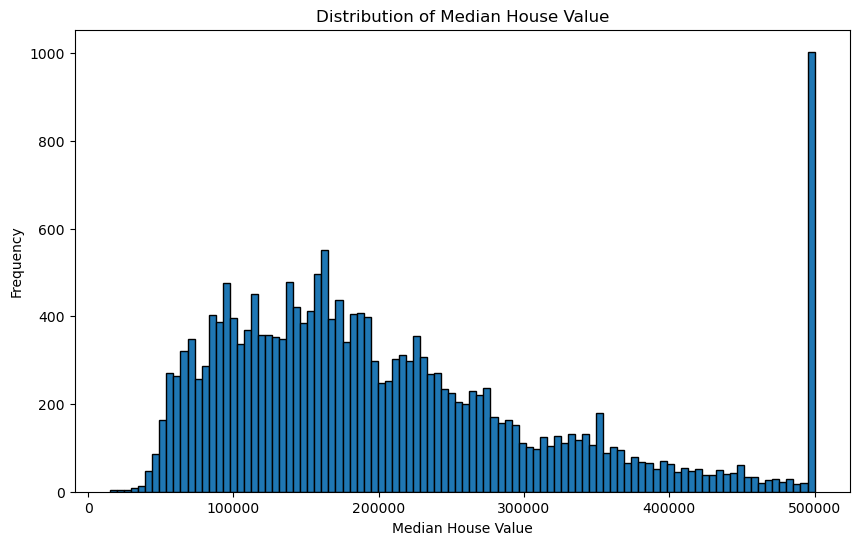

In [10]:
plt.figure(figsize=(10, 6))
cdf['median_house_value'].hist(bins=100, edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

2. Check out what variables correlates the most with "median house value"

In [11]:
correlation_matrix = cdf.corr()
correlation_with_target = correlation_matrix["median_house_value"].sort_values(ascending=False)
print(correlation_with_target)

median_house_value          1.000000
median_income               0.688652
rooms_per_household         0.170930
total_rooms                 0.133314
housing_median_age          0.106462
households                  0.064978
total_bedrooms              0.049701
population_per_household   -0.023645
population                 -0.025248
longitude                  -0.045342
latitude                   -0.144894
bedrooms_per_room          -0.256741
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

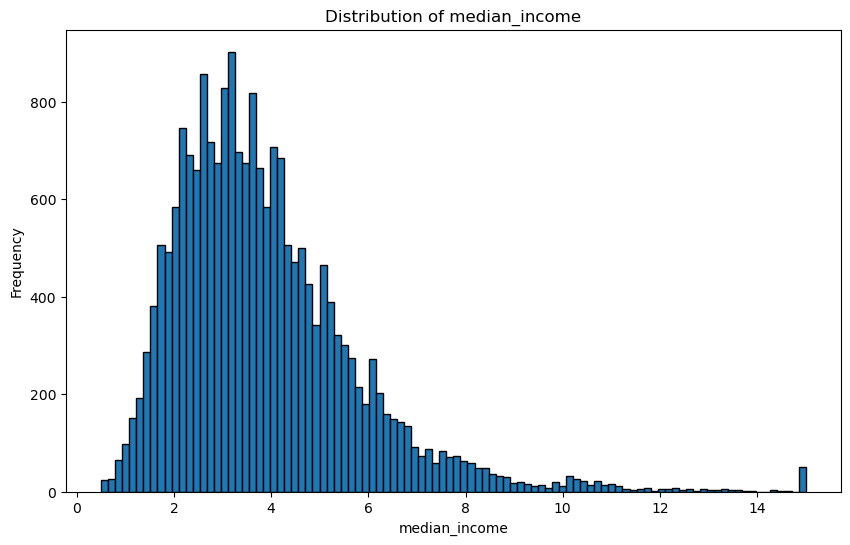

In [12]:
highest_corr_column = correlation_with_target.index[1]
plt.figure(figsize=(10, 6))
cdf[highest_corr_column].hist(bins=100, edgecolor='black')
plt.title(f'Distribution of {highest_corr_column}')
plt.xlabel(highest_corr_column)
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

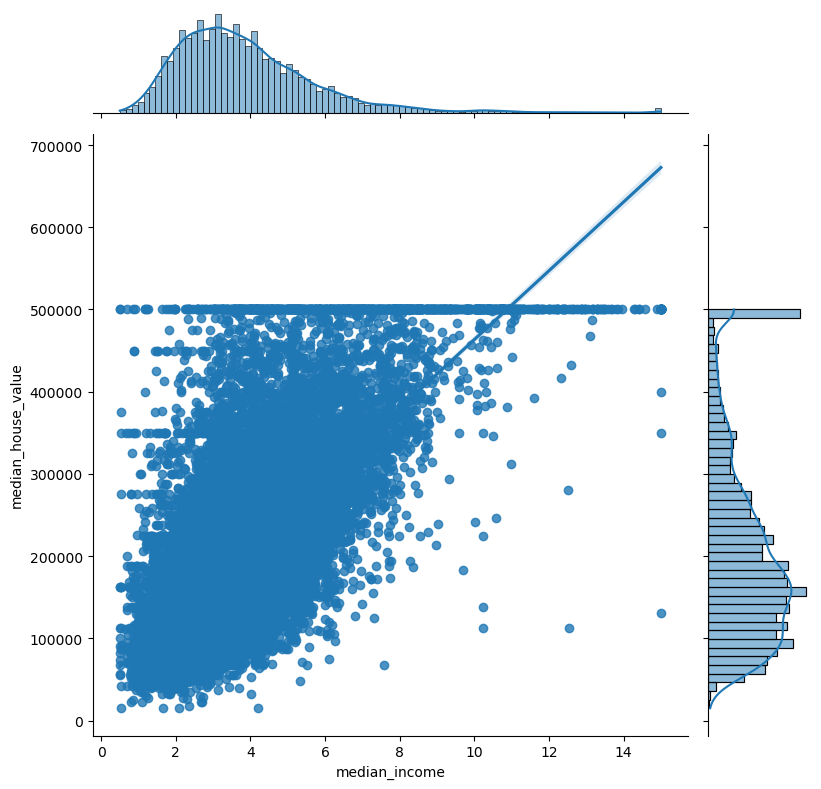

In [13]:
import seaborn as sns

sns.jointplot(
    data=cdf,
    x="median_income",
    y="median_house_value",
    kind="reg",
    height=8
)

plt.show()

We see that median_income correlates well with median_house_value

5. Make the same visualization as in the above, but, change the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

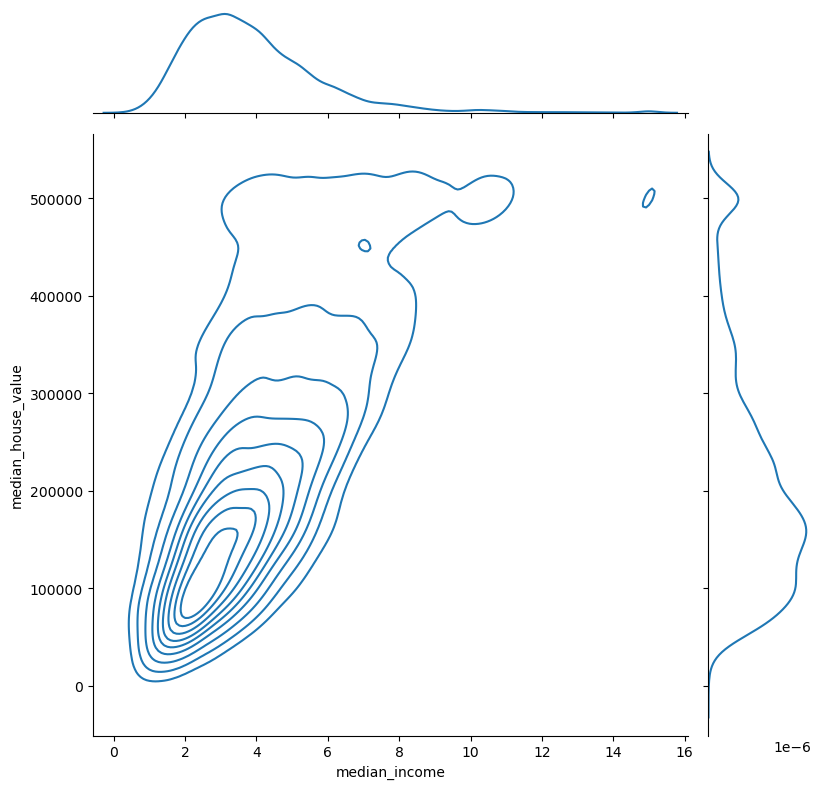

In [14]:
sns.jointplot(
    data=cdf,
    x="median_income",
    y="median_house_value",
    kind="kde",
    height=8
)

plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [15]:
quartiles = [0, 0.25, 0.5, 0.75, 0.95, 1]
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

cdf["income_cat"] = pd.qcut(cdf["median_income"], q=quartiles, labels=labels)
cdf[["median_income", "income_cat"]].head()

,median_income,income_cat
0,8.3252,Very High
1,8.3014,Very High
2,7.2574,High
3,5.6431,High
4,3.8462,Above_Average


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

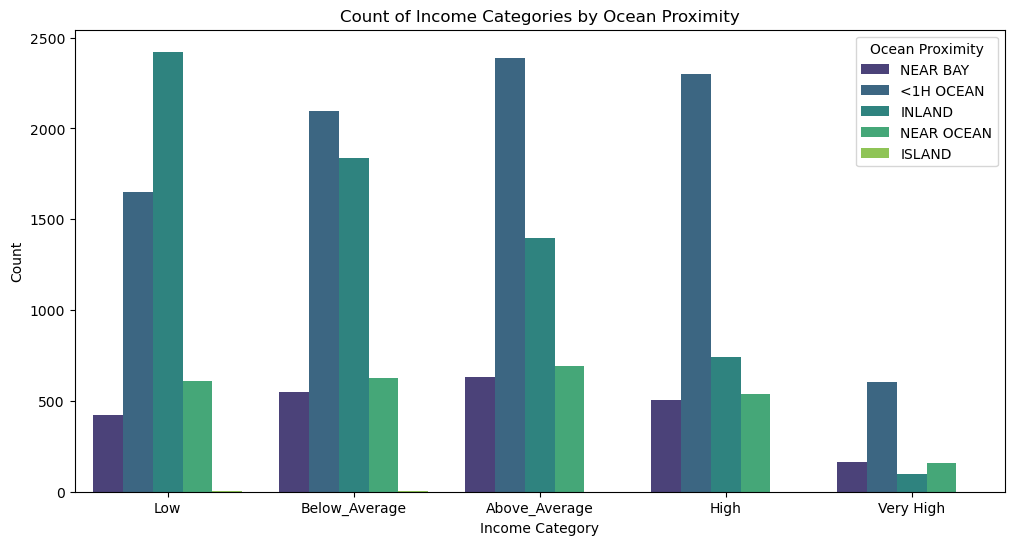

In [19]:
cdf["ocean_proximity"] = df["ocean_proximity"]

plt.figure(figsize=(12, 6))
sns.countplot(data=cdf, x="income_cat", hue="ocean_proximity", palette="viridis")
plt.title("Count of Income Categories by Ocean Proximity")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.legend(title="Ocean Proximity")
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

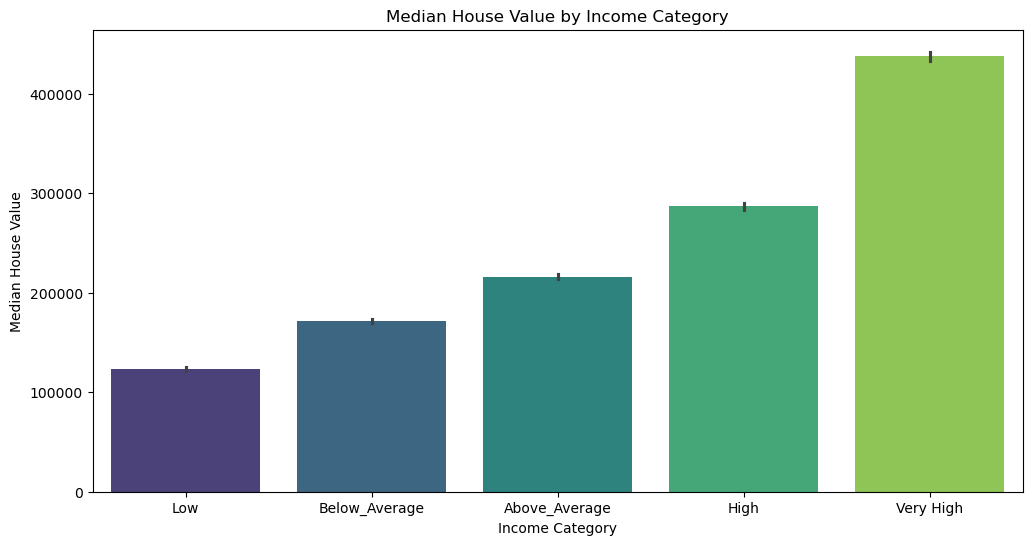

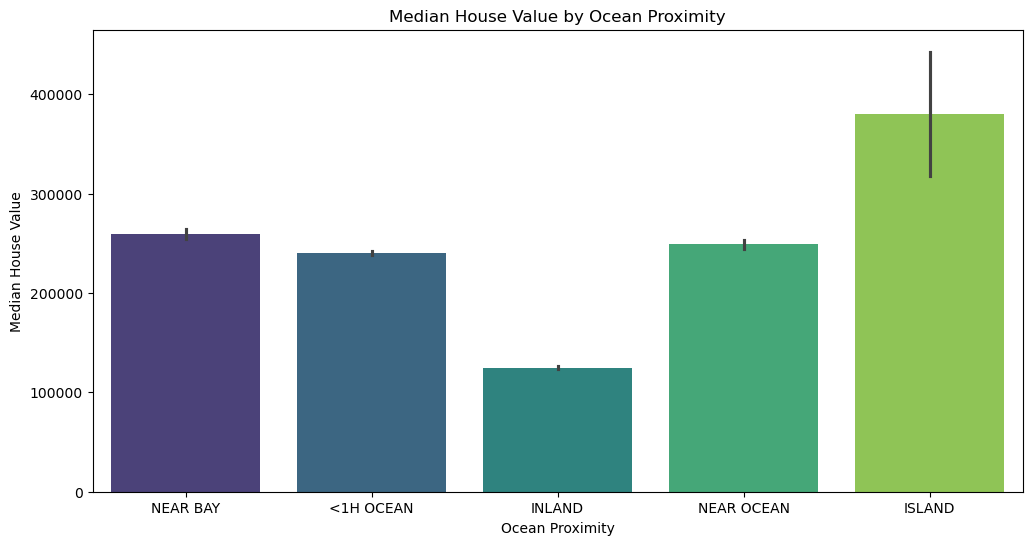

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cdf, x="income_cat", y="median_house_value", hue="income_cat", dodge=False, palette="viridis", legend=False)
plt.title("Median House Value by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=cdf, x="ocean_proximity", y="median_house_value", hue="ocean_proximity", dodge=False, palette="viridis", legend=False)
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [24]:
pivot_df = cdf.pivot_table(index="income_cat", columns="ocean_proximity", aggfunc="size", fill_value=0, observed=False)
if "ISLAND" in pivot_df.columns:
    pivot_df = pivot_df.drop(columns="ISLAND")
pivot_df

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,1651,2423,422,611
Below_Average,2096,1835,546,626
Above_Average,2386,1398,632,691
High,2297,743,505,540
Very High,603,95,165,159


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

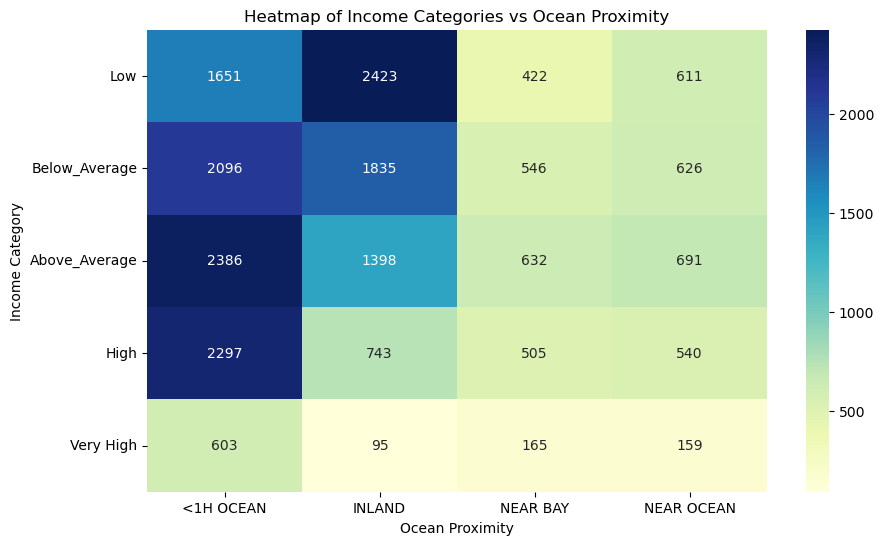

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Income Categories vs Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Income Category")
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.	

In [26]:
cdf = cdf.drop(columns=["income_cat"])
cdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0.146591,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0.155797,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0.129516,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0.184458,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0.172096,NEAR BAY


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [28]:
import scipy.stats as stats
from scipy.stats import zscore

In [29]:
float_columns = cdf.select_dtypes(include=["float64", "int64"]).columns
z_scored = cdf[float_columns].apply(zscore)
z_scored.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.327178,1.051835,0.982245,-0.803953,-0.970467,-0.973604,-0.977135,2.344991,2.129043,0.741063,-0.049440,-1.151198
1,-1.322187,1.042473,-0.606063,2.041934,1.348104,0.861142,1.670222,2.332460,1.313782,0.387873,-0.092137,-0.991576
2,-1.332169,1.037792,1.855815,-0.535335,-0.825704,-0.820046,-0.843721,1.782799,1.258334,1.358446,-0.025807,-1.447268
3,-1.337160,1.037792,1.855815,-0.623654,-0.718913,-0.765330,-0.733850,0.932878,1.164766,0.188652,-0.050169,-0.494595
4,-1.337160,1.037792,1.855815,-0.462117,-0.612121,-0.759153,-0.629212,-0.013181,1.172563,0.408571,-0.085276,-0.708955


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [30]:
dummies = pd.get_dummies(cdf["ocean_proximity"], drop_first=True)
dummies.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


4. Save our predicting variable to `y`.

In [31]:
y = cdf["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [32]:
X = pd.concat([z_scored, dummies], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327178,1.051835,0.982245,-0.803953,-0.970467,-0.973604,-0.977135,2.344991,2.129043,0.741063,-0.049440,-1.151198,False,False,True,False
1,-1.322187,1.042473,-0.606063,2.041934,1.348104,0.861142,1.670222,2.332460,1.313782,0.387873,-0.092137,-0.991576,False,False,True,False
2,-1.332169,1.037792,1.855815,-0.535335,-0.825704,-0.820046,-0.843721,1.782799,1.258334,1.358446,-0.025807,-1.447268,False,False,True,False
3,-1.337160,1.037792,1.855815,-0.623654,-0.718913,-0.765330,-0.733850,0.932878,1.164766,0.188652,-0.050169,-0.494595,False,False,True,False
4,-1.337160,1.037792,1.855815,-0.462117,-0.612121,-0.759153,-0.629212,-0.013181,1.172563,0.408571,-0.085276,-0.708955,False,False,True,False


# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16343, 16)
X_test shape: (4086, 16)
y_train shape: (16343,)
y_test shape: (4086,)


#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.31972973e-10  1.13686838e-10 -3.30255514e-11  1.65265685e-10
 -1.10501426e-10 -4.36300738e-11  4.13101168e-12 -1.35252954e-10
  1.15423201e+05  1.89443048e-12  1.45162380e-12  1.75463805e-11
  3.74759531e-11 -1.88956668e-11 -3.20654321e-11 -6.71863037e-12]
Intercept: 206859.02653091194


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

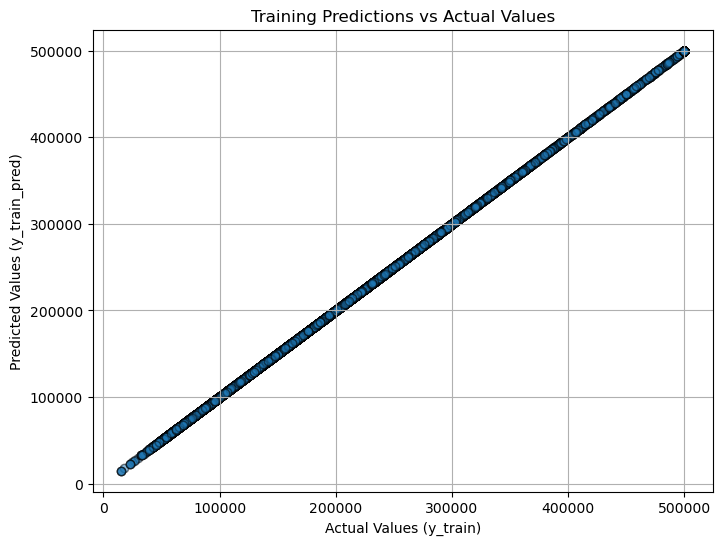

In [36]:
y_train_pred = model.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, edgecolor='k')
plt.title("Training Predictions vs Actual Values")
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.grid(True)
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1.5790818068177834e-20
R^2 Score: 1.0


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

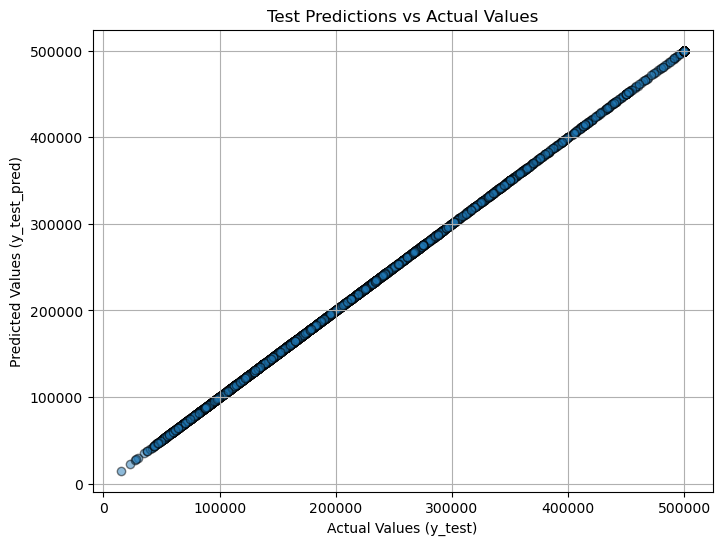

In [40]:
y_test_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
plt.title("Test Predictions vs Actual Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.grid(True)
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [43]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("R^2 Score on Test Data:", r2_test)

Mean Squared Error (MSE) on Test Data: 1.605263217372022e-20
R^2 Score on Test Data: 1.0


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [45]:
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE) on Test Data:", rmse_test)

Root Mean Squared Error (RMSE) on Test Data: 1.2669898252835426e-10


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [46]:
results_df = pd.DataFrame({
    "Actual Values": y_test,
    "Predicted Values": y_test_pred
})
print(results_df.head())

       Actual Values  Predicted Values
17085       202800.0          202800.0
1590        382200.0          382200.0
1724         69800.0           69800.0
5200         94200.0           94200.0
12394       318100.0          318100.0


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [47]:
absolute_errors = abs(results_df["Actual Values"] - results_df["Predicted Values"])
print(absolute_errors.head())

17085    8.731149e-11
1590     0.000000e+00
1724     5.820766e-11
5200     8.731149e-11
12394    2.328306e-10
dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [48]:
mean_absolute_error = absolute_errors.mean()
print("Mean Absolute Error (MAE):", mean_absolute_error)

Mean Absolute Error (MAE): 9.368997403637953e-11


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
print("RandomForestRegressor model has been trained.")

RandomForestRegressor model has been trained.


2. Make prediction on the test data and evaluate you results.

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regressor - Mean Squared Error (MSE):", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

Random Forest Regressor - Mean Squared Error (MSE): 4515.302398580519
Random Forest Regressor - R^2 Score: 0.9999996566098232
